Importing the Dependencies

##### 📌 Problem Statement

Accurately estimating calorie expenditure is essential for fitness tracking, health monitoring, and personalized workout planning. 
This project aims to build a machine learning model that predicts the number of calories burned during physical activity using physiological parameters such as age, height, weight, heart rate, body temperature, and exercise duration.

The objective is to:
- Analyze relationships between physiological features
- Compare multiple regression models
- Identify the best-performing model for calorie prediction


##### 📊 Dataset Overview

The dataset contains physiological and activity-related information used to predict calorie expenditure.

### Features:
- **Gender** – Male/Female
- **Age** – Age of the individual
- **Height** – Height in centimeters
- **Weight** – Weight in kilograms
- **Duration** – Exercise duration in minutes
- **Heart Rate** – Average heart rate during exercise
- **Body Temperature** – Body temperature during activity

### Target Variable:
- **Calories** – Total calories burned


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score , mean_absolute_error
from sklearn.linear_model import LinearRegression

Data Collection & Processing

In [3]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [4]:
exercise_data = pd.read_csv('exercise.csv')

Combining the two Dataframes

In [15]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
print(calories_data['Gender'].unique())


['male' 'female']


In [17]:
calories_data['Gender'] = calories_data['Gender'].astype(str).str.lower()
calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})


In [18]:
calories_data = calories_data.dropna()


In [19]:
X = calories_data.drop(columns=['User_ID', 'Calories'])
Y = calories_data['Calories']


In [20]:
print(calories_data.shape)


(15000, 9)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)


In [22]:
calories_data.isnull().sum()


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

LINEAR REGRESSION


In [23]:


lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

lr_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(Y_test, lr_pred)
lr_r2 = r2_score(Y_test, lr_pred)

print("Linear Regression:")
print("MAE:", lr_mae)
print("R2 Score:", lr_r2)


Linear Regression:
MAE: 8.385188053147184
R2 Score: 0.9668790377181355


Data understanding

In [8]:
# checking the number of rows and columns
calories_data.shape
# getting some informations about the data
calories_data.info()
# checking for missing values
calories_data.isnull().sum()
# get some statistical measures about the data
calories_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data visualixation

In [9]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

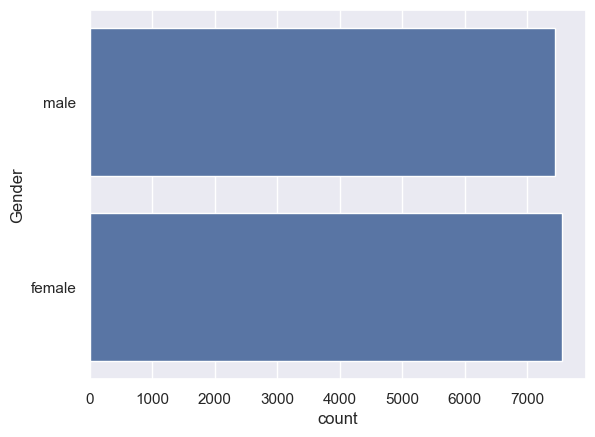

In [10]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

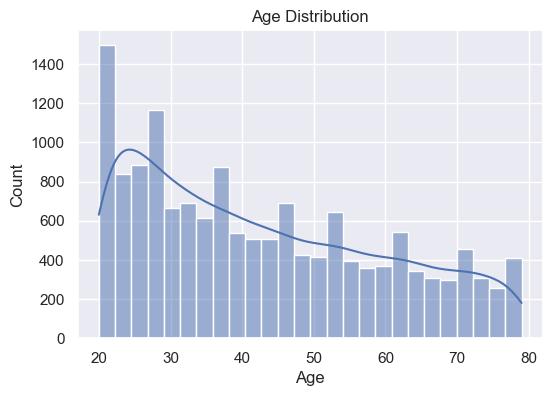

In [11]:
# finding the distribution of "Age" column
plt.figure(figsize=(6,4))
sns.histplot(calories_data['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


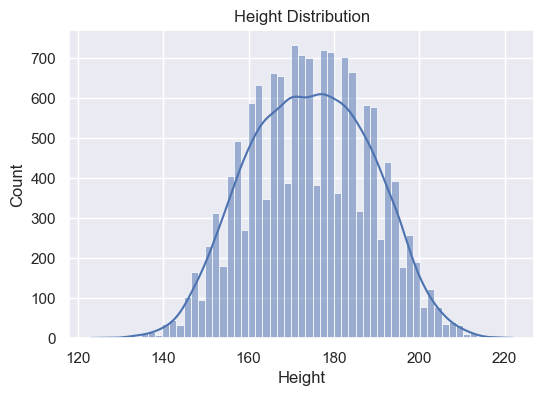

In [12]:
# finding the distribution of "Height" column
plt.figure(figsize=(6,4))
sns.histplot(calories_data['Height'], kde=True)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()


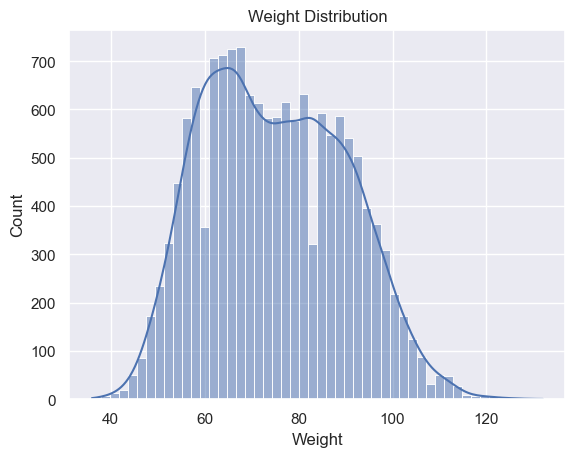

In [13]:
# finding the distribution of "Weight" column
sns.histplot(calories_data['Weight'], kde=True)
plt.title("Weight Distribution")
plt.show()


encode gender

In [7]:
calories_data = calories_data.dropna()


Data analysis

In [8]:
# Selecting only numeric columns for correlation
numeric_data = calories_data.select_dtypes(include=['int64', 'float64'])


finding the correlation in dataset

1. Positive Correlation
2. Negative Correlation

##### 📊 Correlation Analysis of Features



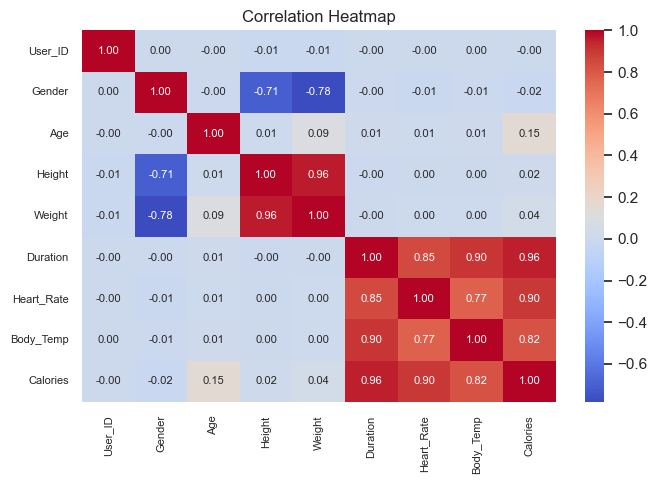

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(
    numeric_data.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


 Feature Selection and Train-Test Split



In [24]:
X = calories_data.drop(columns=['User_ID', 'Calories'])
Y = calories_data['Calories']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)


In [25]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)



XGBOOST MODEL

In [26]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, Y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(Y_test, xgb_pred)
xgb_r2 = r2_score(Y_test, xgb_pred)

print("\nXGBoost:")
print("MAE:", xgb_mae)
print("R2 Score:", xgb_r2)



XGBoost:
MAE: 1.5109401774505775
R2 Score: 0.998836447579553


COMPARISION

In [27]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "XGBoost"],
    "MAE": [lr_mae, xgb_mae],
    "R2 Score": [lr_r2, xgb_r2]
})

comparison


,Model,MAE,R2 Score
0,Linear Regression,8.385188,0.966879
1,XGBoost,1.510940,0.998836


graphical comparision of two model

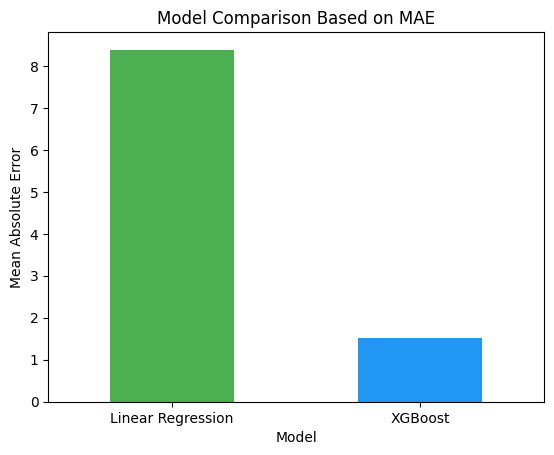

In [28]:
#lower MAE = more better model 
import matplotlib.pyplot as plt

comparison.plot(
    x="Model",
    y="MAE",
    kind="bar",
    legend=False,
    color=["#4CAF50", "#2196F3"]
)

plt.title("Model Comparison Based on MAE")
plt.ylabel("Mean Absolute Error")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.show()


##### ✅ Conclusion

In this project, a machine learning-based approach was implemented to predict calorie expenditure using physiological and activity-related features such as age, height, weight, heart rate, body temperature, and exercise duration.

Key conclusions from the analysis:
- Exercise duration and heart rate are the most influential factors affecting calorie burn.
- Linear Regression provided a baseline performance.
- Polynomial Regression captured non-linear patterns better than linear models.
- XGBoost achieved the best performance due to its ability to model complex relationships.
- The model demonstrated strong predictive capability with a low Mean Absolute Error.

This project highlights the importance of data analysis, feature selection, and model comparison in building accurate machine learning systems.  
It also demonstrates how machine learning can be applied in real-world fitness and health-related applications.
#### 🚀 Future Improvements

- **Hyperparameter Tuning**  
  Apply GridSearchCV or RandomizedSearchCV to optimize model performance and reduce prediction error.

- **Feature Engineering**  
  Create additional features such as BMI or activity intensity to improve model accuracy.

- **Cross-Validation**  
  Use k-fold cross-validation instead of a single train-test split to ensure better generalization.

- **Model Explainability**  
  Analyze feature importance or use SHAP values to understand how different features impact calorie prediction.

- **Deployment & Real-World Usage**  
  Deploy the model using Streamlit or Flask to allow users to predict calories burned through a simple web interface.


